In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_merge_file = "../data/output/dataset_merge.tsv"

In [3]:
df_dataset = pd.read_csv(dataset_merge_file, sep="\t")
df_dataset['af-plddt'] = 1 - df_dataset['af-disorder']
df_dataset

,disprot_id,acc,pos,aa,disorder,linker,transition,nucleic acid binding,binding,protein binding,af-binding,af-disorder,af-rsa,pdb,disorder-mean,binding-mean,af-plddt
0,DP02342,P06837,1,M,1.0,NaN,NaN,NaN,NaN,NaN,0.887,0.270,0.897,NaN,0.815789,0.888889,0.730
1,DP02342,P06837,2,L,1.0,NaN,NaN,NaN,NaN,NaN,0.889,0.266,0.891,NaN,0.763158,0.814815,0.734
2,DP02342,P06837,3,C,1.0,NaN,NaN,NaN,NaN,NaN,0.893,0.256,0.885,NaN,0.736842,0.814815,0.744
3,DP02342,P06837,4,C,1.0,NaN,NaN,NaN,NaN,NaN,0.876,0.296,0.878,NaN,0.789474,0.851852,0.704
4,DP02342,P06837,5,M,1.0,NaN,NaN,NaN,NaN,NaN,0.878,0.292,0.873,NaN,0.815789,0.888889,0.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297691,DP03758,Q96ST2,815,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297692,DP03758,Q96ST2,816,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297693,DP03758,Q96ST2,817,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297694,DP03758,Q96ST2,818,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# DisProt disorder, AF order, predictors disorder
accs = df_dataset[(df_dataset['disorder'] == 1) & (df_dataset['af-plddt'] > 0.7) & (df_dataset['disorder-mean'] >= 0.9)]['acc'].unique()
df_ = df_dataset.loc[df_dataset['acc'].isin(accs)]

In [5]:
df_['acc'].unique()

array(['Q8N5F7', 'Q14181', 'O00165', 'O75920', 'O80837', 'Q7V2C8',
       'O16043', 'Q13316', 'P56211', 'P51397', 'P50579', 'Q8NC51',
       'A0A256WXF2', 'Q9H9R9', 'A0A1B0GTR3'], dtype=object)

In [6]:
df_.loc[df_['acc'] == "Q8N5F7"]

,disprot_id,acc,pos,aa,disorder,linker,transition,nucleic acid binding,binding,protein binding,af-binding,af-disorder,af-rsa,pdb,disorder-mean,binding-mean,af-plddt
227,DP02348,Q8N5F7,1,M,1.0,NaN,NaN,NaN,NaN,NaN,0.825,0.417,0.937,NaN,0.921053,0.888889,0.583
228,DP02348,Q8N5F7,2,A,1.0,NaN,NaN,NaN,NaN,NaN,0.828,0.411,0.936,NaN,0.947368,0.925926,0.589
229,DP02348,Q8N5F7,3,P,1.0,NaN,NaN,NaN,NaN,NaN,0.882,0.283,0.932,NaN,0.921053,0.888889,0.717
230,DP02348,Q8N5F7,4,V,1.0,NaN,NaN,NaN,NaN,NaN,0.875,0.297,0.927,NaN,0.921053,0.851852,0.703
231,DP02348,Q8N5F7,5,S,1.0,NaN,NaN,NaN,NaN,NaN,0.784,0.516,0.932,NaN,0.947368,0.777778,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,DP02348,Q8N5F7,411,G,1.0,NaN,NaN,NaN,NaN,NaN,0.849,0.361,0.662,NaN,0.815789,0.814815,0.639
638,DP02348,Q8N5F7,412,K,1.0,NaN,NaN,NaN,NaN,NaN,0.835,0.394,0.667,NaN,0.815789,0.814815,0.606
639,DP02348,Q8N5F7,413,D,1.0,NaN,NaN,NaN,NaN,NaN,0.843,0.376,0.665,NaN,0.842105,0.814815,0.624
640,DP02348,Q8N5F7,414,D,1.0,NaN,NaN,NaN,NaN,NaN,0.831,0.402,0.661,NaN,0.842105,0.814815,0.598


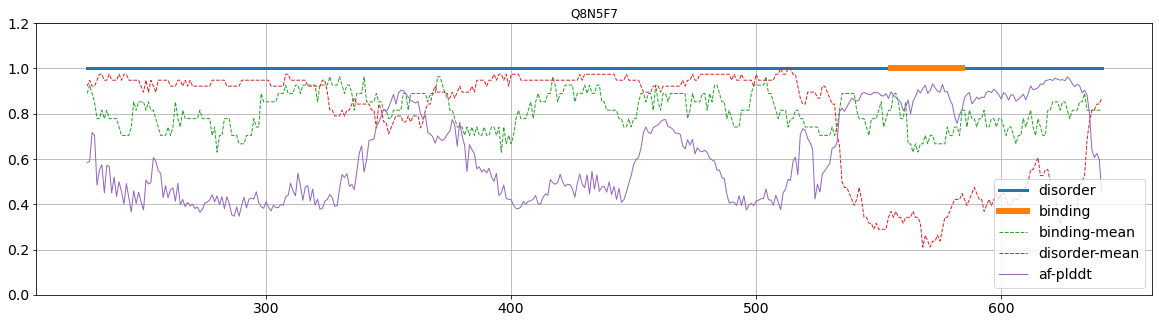

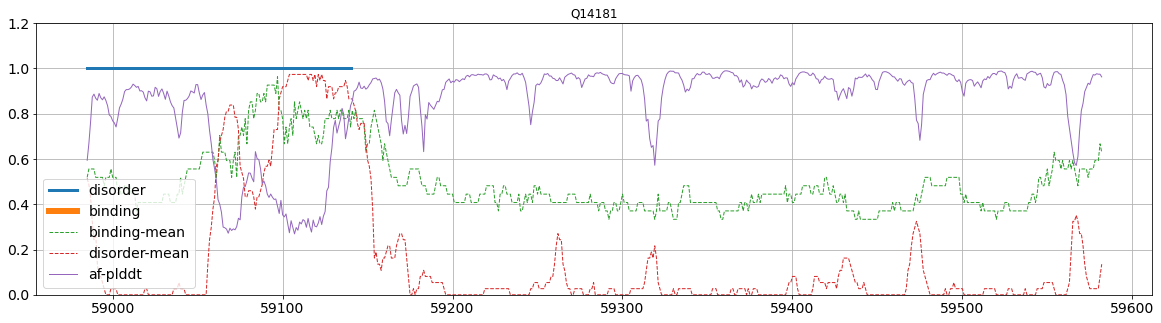

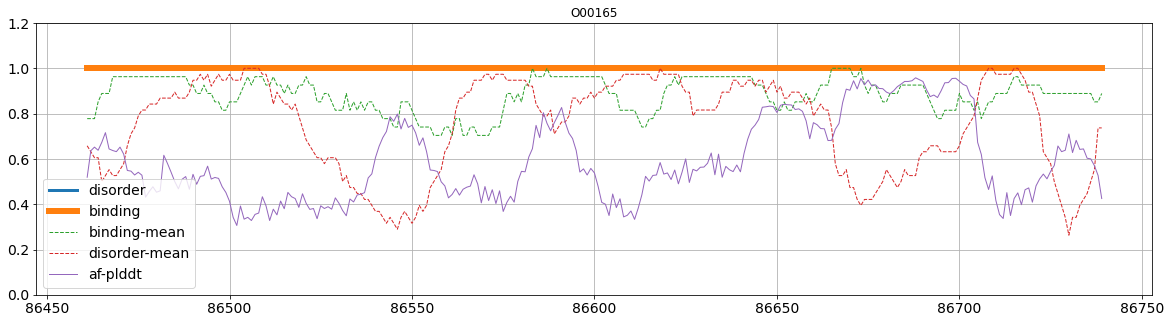

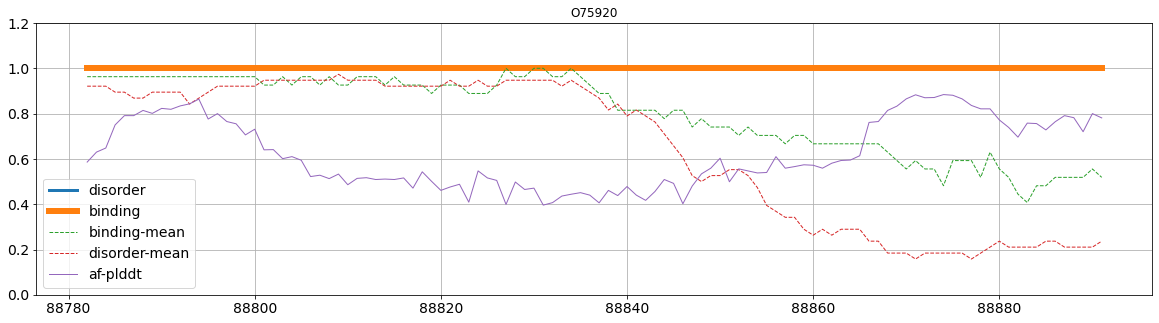

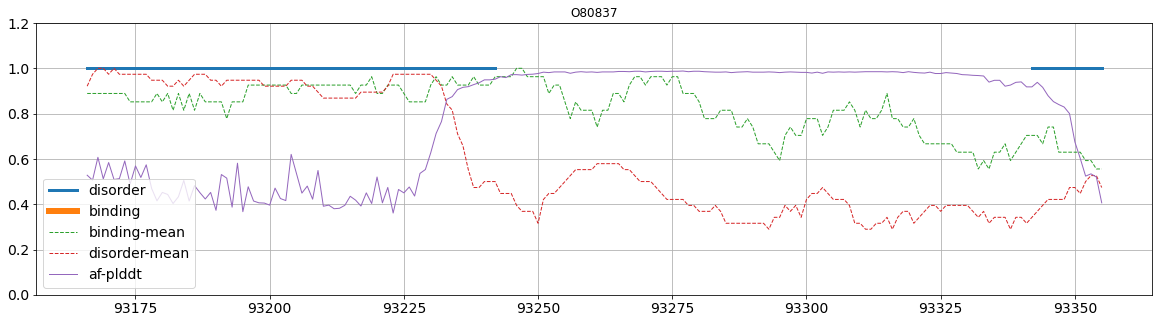

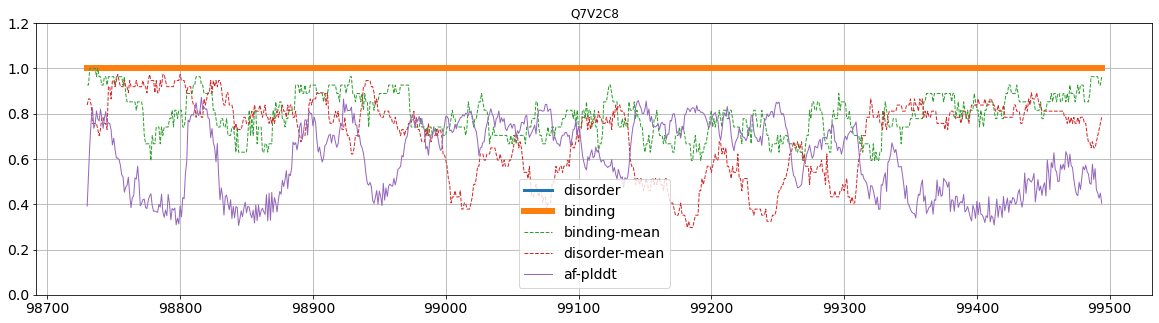

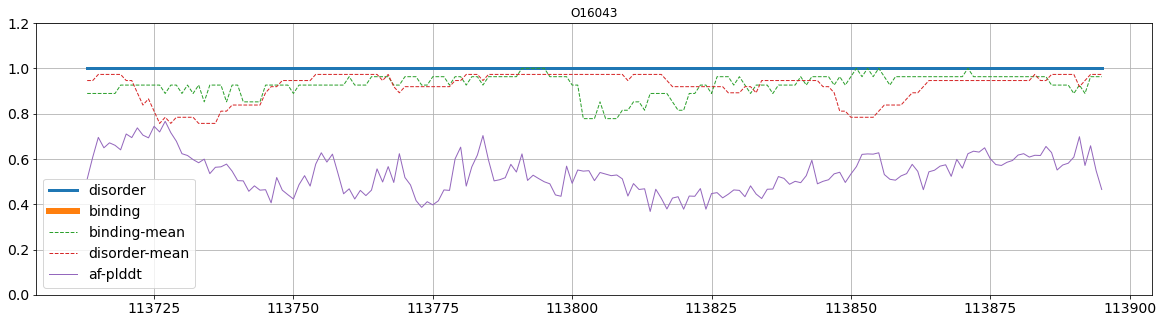

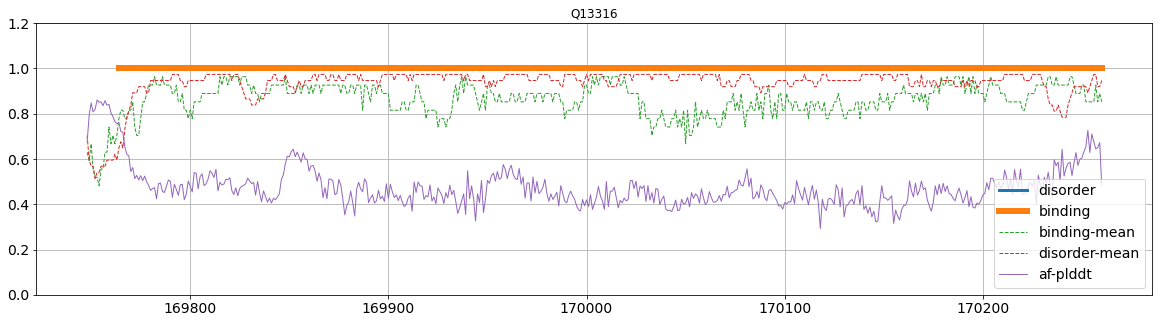

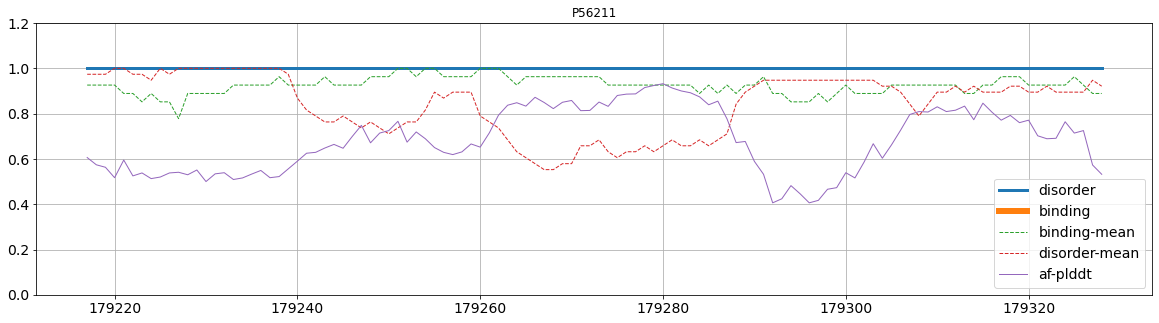

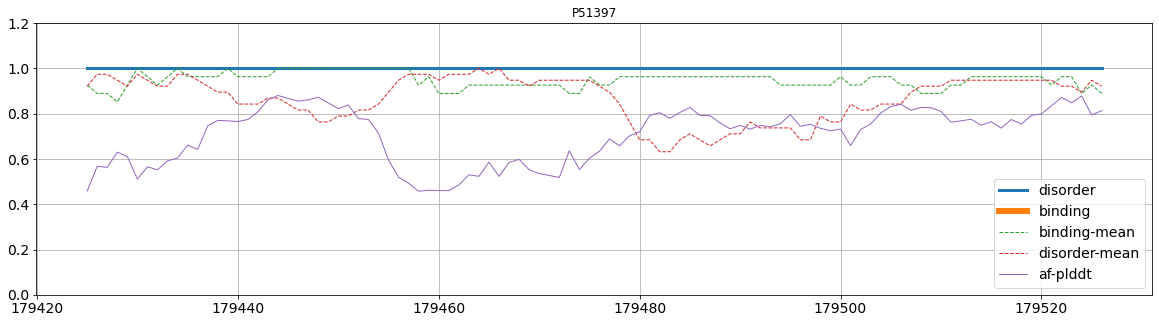

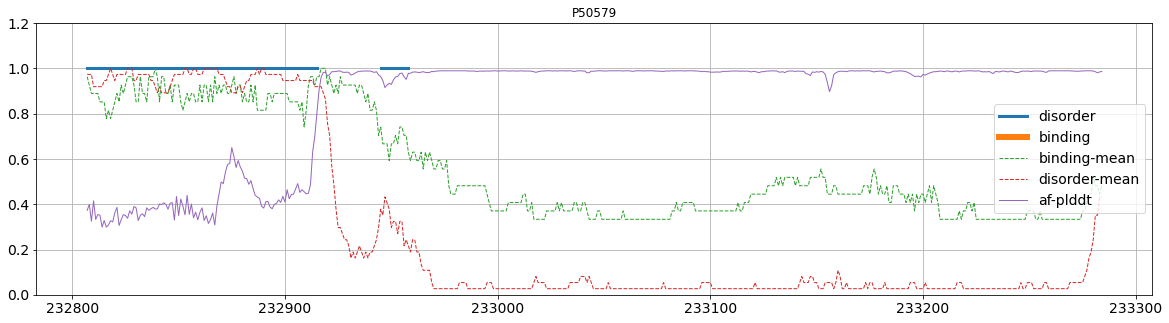

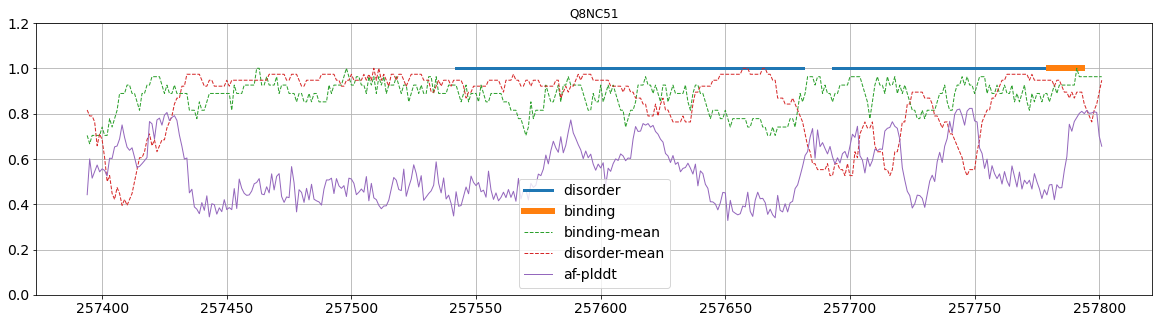

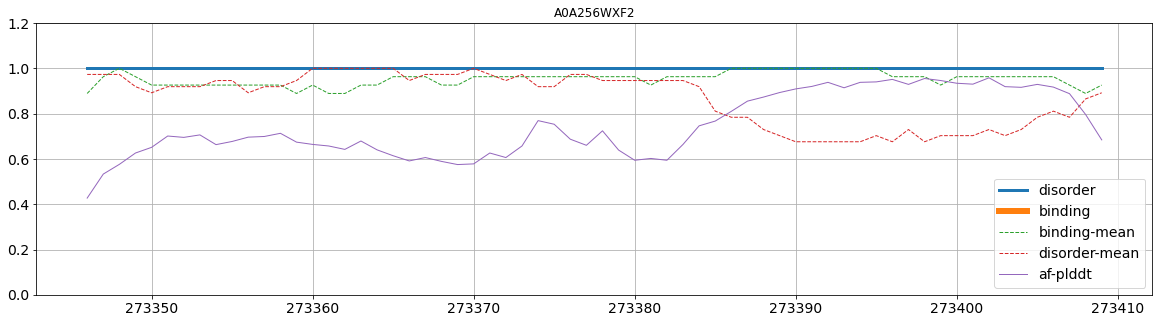

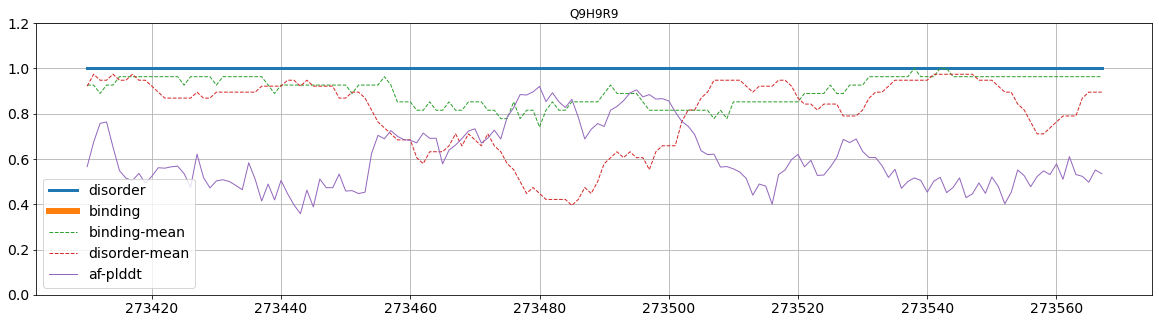

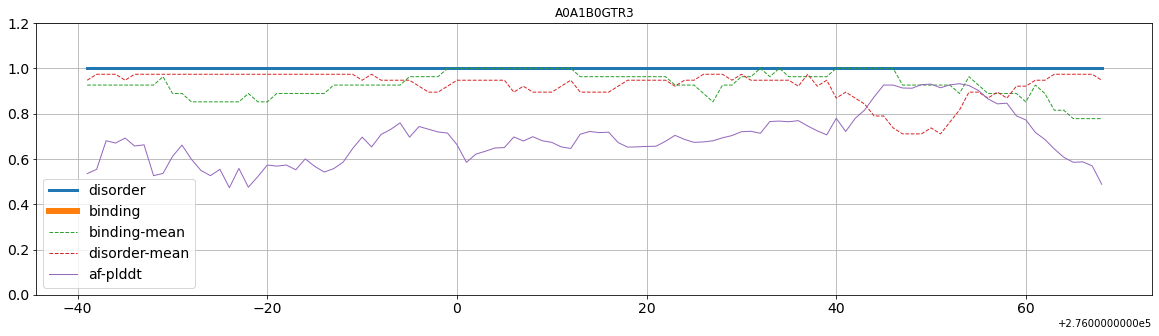

In [19]:
for acc in df_['acc'].unique():
    df_acc = df_.loc[df_['acc'] == acc, ['disorder', 'binding', 'binding-mean', 'disorder-mean', 'af-plddt']]
    ax = df_acc.plot(title=acc, ylim=(0,1.2), grid=True, figsize=(20,5), fontsize=14)
    style=['-', '-', '--', '--', '-']
    lw=[3, 6, 1, 1, 1]
    for i, l in enumerate(ax.lines):
        plt.setp(l, linestyle=style[i], linewidth=lw[i])
    ax.legend(prop={'size': 14})